In [14]:
# Import the libaries
# We import required libraries for dataset handling, preprocessing, model building (Keras), and evaluation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [15]:
# Step 2: Load Dataset
# The dataset contains 569 samples and 30 features, with a binary target (0 = malignant, 1 = benign).
data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset shape:", X.shape)
print("Target shape:", y.shape)
print("Classes:", data.target_names)

Dataset shape: (569, 30)
Target shape: (569,)
Classes: ['malignant' 'benign']


In [16]:
# Step 3: Preprocess Data
# Train-test split
# We split the dataset into training (80%) and testing (20%) and apply StandardScaler to normalize features for stable NN training.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Step 4: Build Feedforward Neural Network
# Input layer has 30 features.
# Two hidden layers: 32 → 16 neurons with ReLU activation.
# Dropout prevents overfitting
# Output layer uses sigmoid since it’s binary classification.
# Binary cross-entropy is the loss function.

from tensorflow.keras import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),   
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Step 5: Train the Model
# We train for 50 epochs, using 20% validation data to monitor performance.
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7610 - loss: 0.5624 - val_accuracy: 0.9011 - val_loss: 0.4296
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9286 - loss: 0.3415 - val_accuracy: 0.9341 - val_loss: 0.2706
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9478 - loss: 0.2195 - val_accuracy: 0.9560 - val_loss: 0.1862
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.1626 - val_accuracy: 0.9560 - val_loss: 0.1421
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9615 - loss: 0.1337 - val_accuracy: 0.9560 - val_loss: 0.1208
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.1154 - val_accuracy: 0.9560 - val_loss: 0.1004
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.0977 - val_accuracy: 0.9670 - val_loss: 0.0895
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9780 - loss: 0.0845 - val_accuracy: 0.9670 - val_loss:

In [21]:
# Step 6: Evaluate the Model
# Predictions
# We convert probabilities to binary predictions (>0.5 = class 1). 
# Then, we calculate accuracy, precision, recall, F1-score, and confusion matrix.

X_test = np.array(X_test, dtype=np.float32)
y_pred_prob = model.predict(X_test, verbose=0).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("\nModel Evaluation on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation on Test Set
Accuracy: 0.9649122807017544
Precision: 0.9857142857142858
Recall: 0.9583333333333334
F1-Score: 0.971830985915493

Confusion Matrix:
 [[41  1]
 [ 3 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



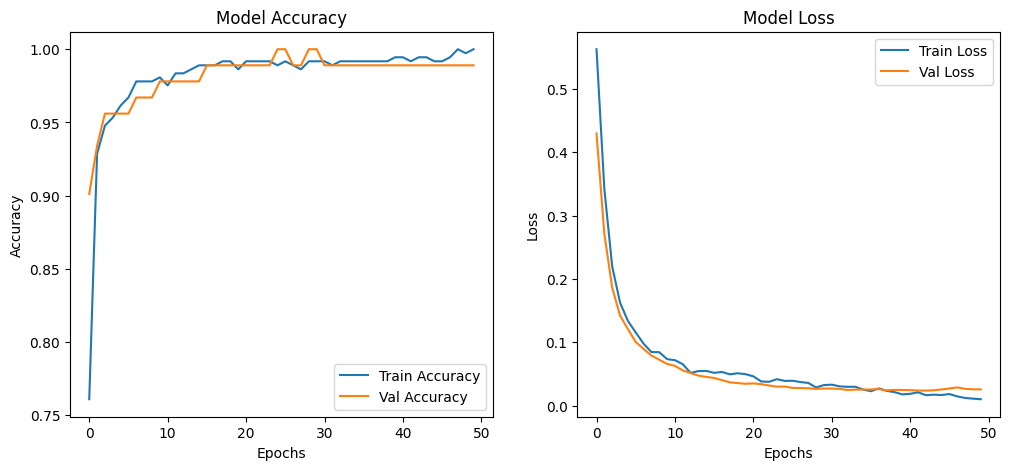

In [23]:
# Step 7: Visualize Training History
# Visualizing training history helps us check for overfitting or underfitting.
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()